In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from diagnostics import lm_plots

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

## Exercise 9

This question involves the use of multiple linear regression on the `Auto` dataset.

In [2]:
auto = pd.read_csv('../datasets/Auto.csv')

__(a) Produce a scatterplot matrix which includes all of the variables in the dataset__

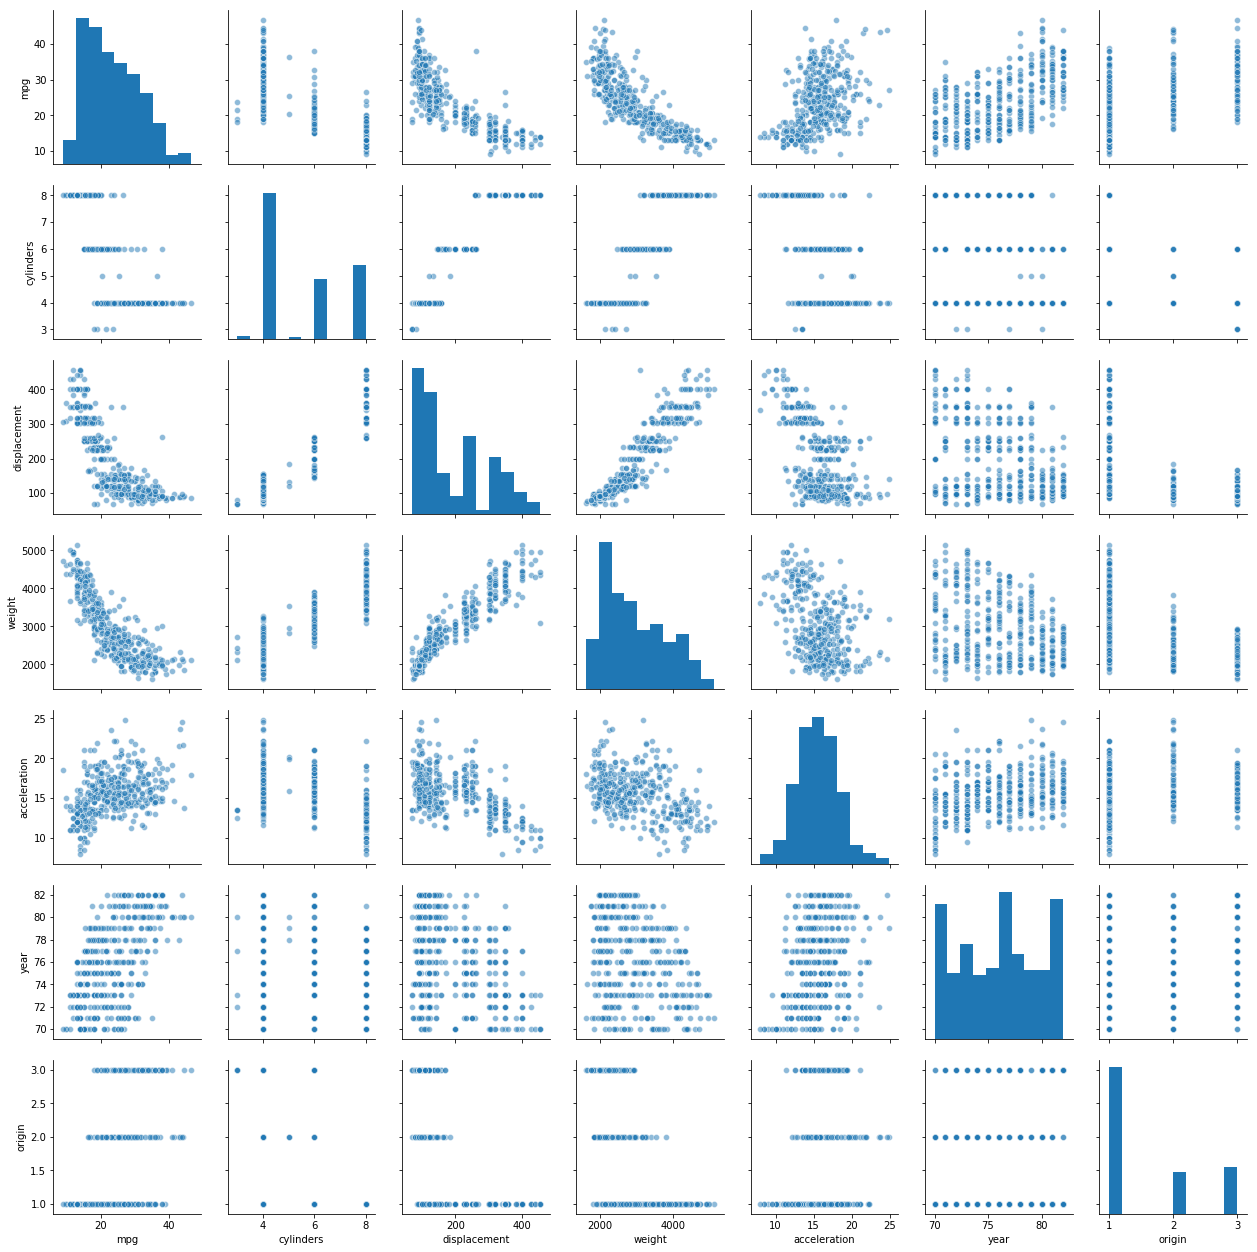

In [3]:
sns.pairplot(auto, plot_kws={'alpha': 0.5});

__(b) Compute the matrix of correlations between the variables using the function `pd.corr()`. You will need to exclude the name variable, which is qualitative.__

In [4]:
auto.drop('name', axis=1).corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


__(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output__

In [19]:
X = auto.drop(['mpg', 'name'], axis=1)
y = auto.mpg

XwithIntercept = sm.add_constant(X)
XwithIntercept['horsepower'] = pd.to_numeric(XwithIntercept['horsepower'], errors='coerce').fillna(0)
model = sm.OLS(y, XwithIntercept).fit()

__Questions:__

- Is there a relationship between the predictors and the response?

Yes. R2 is 0.82 which means that a lot of `y`s variance is explained by the given `X`s

- Which predictors appear to have a statistically significant relationship to the response?

All but `cylinders` (pvalue of 0.15), `horsepower` (pvalue of 0.18) and `acceleration` (pvalue of 0.3)

- What does the coefficient for the year variable suggest?

That newer cars are more efficient (higher miles-per-gallon).

__(d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?__

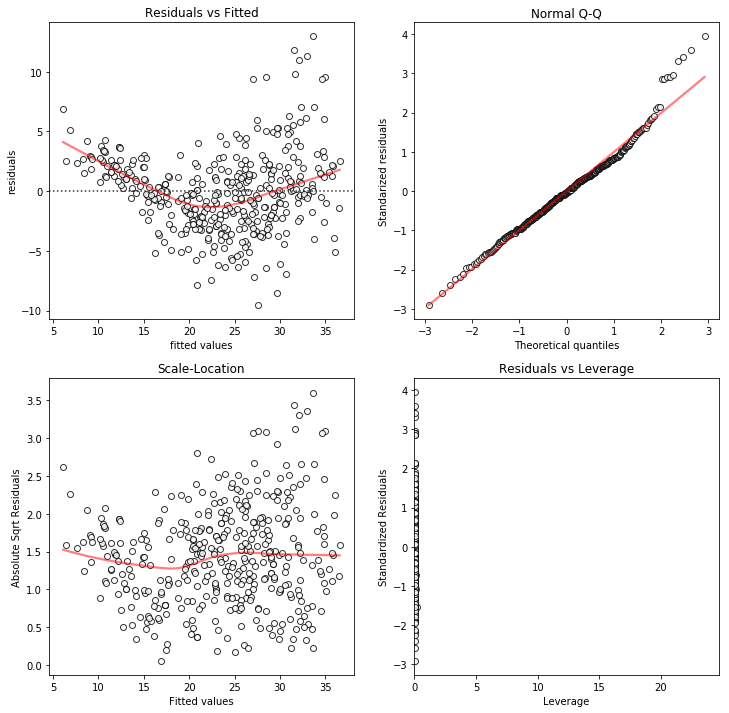

In [7]:
lm_plots(model, y)

__observations__

- Seems the relation between predictors and response may be non- linear, perhaps some polynomial features or a more flexible model is needed.

- Q-Q plot shows that residuals are pretty much normal. No issues there.

- No signs of high heterosquedasticity.

- No high leverage points.

__(e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?__

In [25]:
XwithInteraction = XwithIntercept.copy()
XwithInteraction['a_d'] = XwithInteraction['acceleration'] * XwithInteraction['displacement']
XwithInteraction['w_c'] = XwithInteraction['weight'] * XwithInteraction['cylinders']

i_model = sm.OLS(y, XwithInteraction).fit()
i_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     266.2
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          8.69e-160
Time:                        18:10:54   Log-Likelihood:                -988.01
No. Observations:                 397   AIC:                             1996.
Df Residuals:                     387   BIC:                             2036.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.1229      5.530     -1.288      0.198     -17.995       3.749
cylinders       -3.9471      0.610     -6.466      0.000      -5.147      -2.747
displacement     0.0444      0.009      4.691      0.000       0.026       0.063
horsepower      -0.0368      0.010     -3.548      0.000      -0.057      -0.016
weight          -0.0127      0.001    -10.348      0.000      -0.015      -0.010
acceleration     0.5665      0.128      4.426      0.000       0.315       0.818
year             0.8065      0.045     18.005      0.000       0.718       0.895
origin           0.6771      0.257      2.639      0.009       0.173       1.182
a_d             -0.0029      0.001     -4.360      0.000      -0.004      -0.002
w_c              0.0013      0.000      7.441      0.000       0.001       0.002
==============================================================================
Omnibus:                       37.440   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.229
Skew:                           0.531   Prob(JB):                     2.80e-17
Kurtosis:                       4.865   Cond. No.                     7.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Yes. Both `acceleration:displacement` and `weight:cylinders` are significant. Model Rsquared is increased almost 5%:

In [27]:
i_model.rsquared - model.rsquared

0.038728517350715363

__(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings__

In [43]:
Xpoly = XwithIntercept.copy()
Xpoly['weight_2'] = np.square(Xpoly['weight'])
Xpoly['displacement_2'] = np.square(Xpoly['displacement'])

p_model = sm.OLS(y, Xpoly).fit()
p_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     265.2
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          1.62e-159
Time:                        18:18:56   Log-Likelihood:                -988.65
No. Observations:                 397   AIC:                             1997.
Df Residuals:                     387   BIC:                             2037.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.6910      4.552     -0.811      0.418     -12.641       5.259
cylinders          0.2522      0.330      0.764      0.445      -0.397       0.901
displacement      -0.0430      0.019     -2.214      0.027      -0.081      -0.005
horsepower        -0.0292      0.010     -2.786      0.006      -0.050      -0.009
weight            -0.0150      0.002     -6.227      0.000      -0.020      -0.010
acceleration       0.0773      0.081      0.950      0.343      -0.083       0.237
year               0.8034      0.045     17.862      0.000       0.715       0.892
origin             0.4958      0.269      1.844      0.066      -0.033       1.024
weight_2        1.486e-06   3.39e-07      4.382      0.000    8.19e-07    2.15e-06
displacement_2  9.611e-05   3.13e-05      3.074      0.002    3.46e-05       0.000
==============================================================================
Omnibus:                       45.548   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.365
Skew:                           0.625   Prob(JB):                     1.19e-21
Kurtosis:                       5.065   Cond. No.                     3.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__observations__

- The model improves compared to the one wiht only linear predictors.
- Squared weights are small.